In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

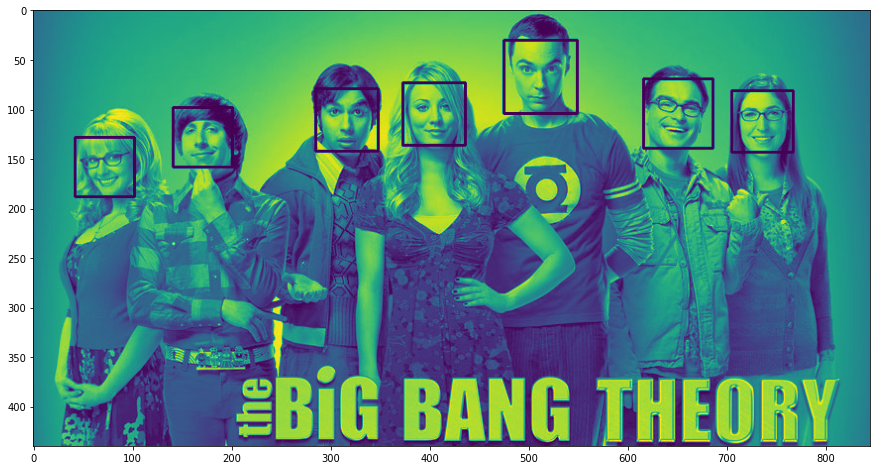

In [3]:
imagePath='./data/faces1.jpg'
cascPath='./xml/haarcascade_frontalface_default.xml'

# Create the haar cascade
faceCascade=cv2.CascadeClassifier(cascPath)

# Read the image
image=cv2.imread(imagePath)
imageRGB=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces=faceCascade.detectMultiScale(gray,
                                   minNeighbors=5, # 얼굴 사이의 최소 간격
                                   minSize=(20,20), # 얼굴의 최소 크기 
                                  ) 

# 검출된 얼굴 주변에 사각형 그리기
for(x,y,w,h)in faces:
    cv2.rectangle(imageRGB,(x,y),(x+w,y+h),(0,255,0),2)

# 얼굴을 검출한 이미지를 화면에 띄우기
plt.figure(figsize=(15,15))
plt.imshow(imageRGB)

In [15]:
def faceDetection(image):
    faceimage=image.copy()
    
    # Create the cascade
    faceCascade=cv2.CascadeClassifier(cascPath)
    
    # Read the image
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces=faceCascade.detectMultiScale(gray,minNeighbors=5,minSize=(20,20))
    
    # draw rectangle
    for(x,y,w,h)in faces:
        cv2.rectangle(faceimage,(x,y),(x+w,y+h),(0,255,0),2)
        
    return faceimage

In [18]:
cap=cv2.VideoCapture('./data/siliconvalley.mp4')

frame_size=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

while True:
    retval, frame=cap.read()
    if not retval:
        break
    
    # face detection
    face=faceDetection(frame)
    cv2.imshow('face',face)
    
    key=cv2.waitKey(25)
    if key == 27:
        break
      
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

frame_size= (576, 324)
